In [1]:
#Data Analysis using the tree cover type dataset, part of sklearn
#Uses XGBoost, a gradient boosting algorithm optimized for speed and performance compared to random forests or decision trees. For more information see: https://xgboost.readthedocs.io/en/latest/

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import xgboost as xgb






c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data_set=fetch_covtype()
# See reference material here for information on cover type classes: https://archive.ics.uci.edu/ml/datasets/Covertype
#Create labels for classes from above website
Cover_Types = {1: "Spruce/Fir", 2: "Lodgepole Pine", 3: "Ponderosa Pine", 4: "Cottonwood/Willow", 5: "Aspen", 6: "Douglas-fir", 7: "Krummholz"}
column_list=['elevation', 'aspect', 'slope', 'hor_dist_hydro', 'vert_dist_hydro', 'hor_dist_road', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
'hor_dist_fire']+[f"wilderness_{i}" for i in range(4)]+[f"soil_type_{i}" for i in range(40)]

df=pd.DataFrame(data_set.data, columns=column_list)
df['labels']=data_set.target



C:\Users\Vik\AppData\Local\Temp/ipykernel_14084/2119816525.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(train.loc[:, [col for col in train.columns if ("soil_type" not in col) and ("wilderness" not in col)]].sample(500), ax=ax)


array([[<AxesSubplot:xlabel='elevation', ylabel='elevation'>,
        <AxesSubplot:xlabel='aspect', ylabel='elevation'>,
        <AxesSubplot:xlabel='slope', ylabel='elevation'>,
        <AxesSubplot:xlabel='hor_dist_hydro', ylabel='elevation'>,
        <AxesSubplot:xlabel='vert_dist_hydro', ylabel='elevation'>,
        <AxesSubplot:xlabel='hor_dist_road', ylabel='elevation'>,
        <AxesSubplot:xlabel='hillshade_9am', ylabel='elevation'>,
        <AxesSubplot:xlabel='hillshade_noon', ylabel='elevation'>,
        <AxesSubplot:xlabel='hillshade_3pm', ylabel='elevation'>,
        <AxesSubplot:xlabel='hor_dist_fire', ylabel='elevation'>,
        <AxesSubplot:xlabel='labels', ylabel='elevation'>],
       [<AxesSubplot:xlabel='elevation', ylabel='aspect'>,
        <AxesSubplot:xlabel='aspect', ylabel='aspect'>,
        <AxesSubplot:xlabel='slope', ylabel='aspect'>,
        <AxesSubplot:xlabel='hor_dist_hydro', ylabel='aspect'>,
        <AxesSubplot:xlabel='vert_dist_hydro', ylabel='aspect

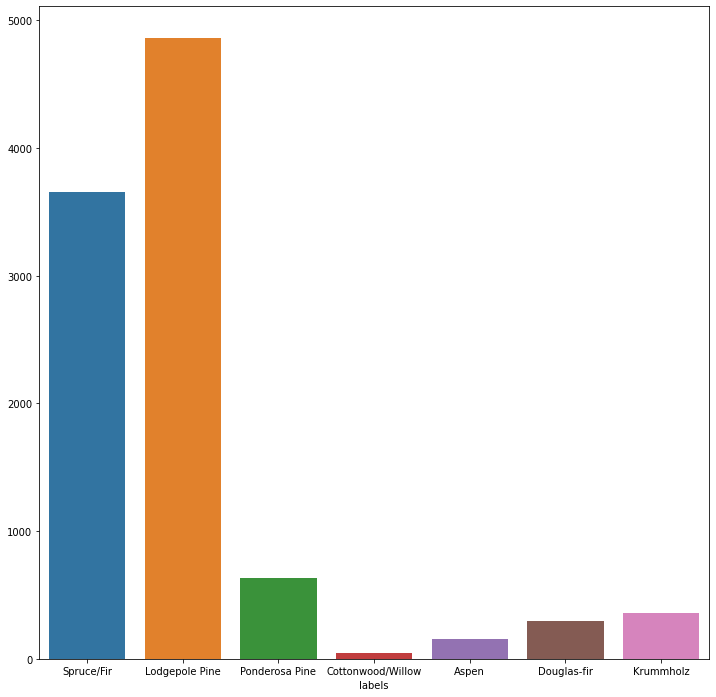

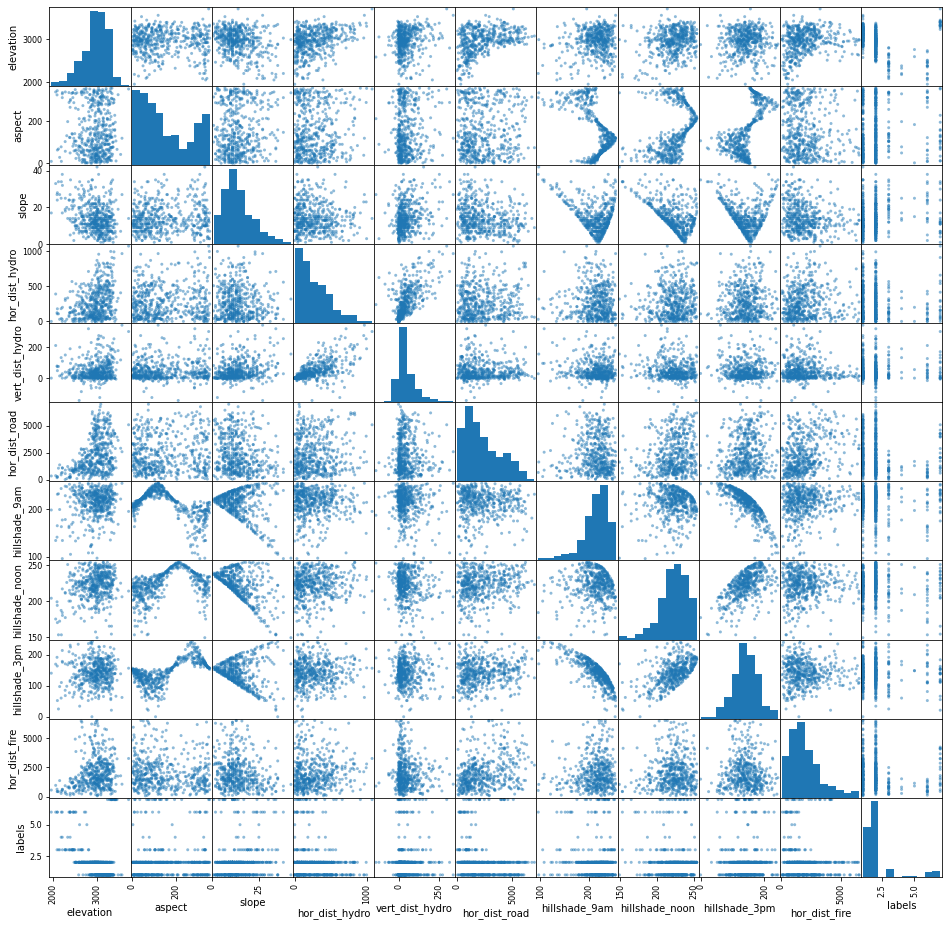

In [3]:
#create test and training data
train,test=train_test_split(df, test_size=0.2, random_state=32)
train=train.sample(10000) #random sample

X_data=pd.DataFrame(train.groupby('labels').size(), columns=['labels'])
X_data.index=X_data.index.map(Cover_Types)

plt.figure(figsize=(12,12))
sns.barplot(data=X_data.T)

fig, ax=plt.subplots(figsize=(16,16))
pd.plotting.scatter_matrix(train.loc[:, [col for col in train.columns if ("soil_type" not in col) and ("wilderness" not in col)]].sample(500), ax=ax)


In [4]:
#Now ready to run algorithm
X=train.drop('labels', axis=1)
Y=train['labels'] #Create X and Y training data

clf=xgb.XGBClassifier(n_jobs=2)
clf.fit(X,Y)

yhat=clf.predict(X)
f1_score(Y, yhat, average='weighted')

c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[11:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9662959557785135

High accuracy for training data

In [5]:
X_test=test.drop('labels', axis=1)
Y_test=test['labels']

yhat_test=clf.predict(X_test)
f1_score(Y_test, yhat_test, average='weighted')




0.7977600251928003

Gives 0.7989. So our score went down - due to Overfitting. Now Change model parameters to examine how it impacts model prediction

In [6]:
clf2 = xgb.XGBClassifier(n_jobs=2, max_depth=13, n_estimators=500)
 # Choose a larger tree depth and more trees for a more complex model
clf2.fit(X,Y)
yhat=clf2.predict(X)
f1_score(Y, yhat, average='weighted')

#Gives score of 1.0, so perfect fit to training data




c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[11:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

In [7]:
yhat_test=clf2.predict(X_test)
f1_score(Y_test, yhat_test, average='weighted')




0.823256404005155

Gives 0.824, so better accuracy than before

In [8]:
#Now try max_depth=1,  for illustration
clf3 = xgb.XGBClassifier(n_jobs=2, max_depth=1, n_estimators=500)
clf3.fit(X,Y)
yhat=clf3.predict(X)
f1_score(Y, yhat, average='weighted')




c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[11:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7604117506580804

Gives 0.759, less accurate than before due to less complex model

In [9]:
yhat_test=clf3.predict(X_test)
f1_score(Y_test, yhat_test, average='weighted')


0.7235771255721333

Gives 0.729